In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, layers 

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
base_folder = "/AI FR/Extracted Faces"
faces = list()
i=0
j=0
for folder in os.listdir("/AI FR/Extracted Faces"):
    face = list()
    for file in os.listdir(os.path.join("/AI FR/Extracted Faces",folder)):
        face.append(plt.imread(os.path.join(base_folder,folder,file)))
    faces.append(face)
        
       
    

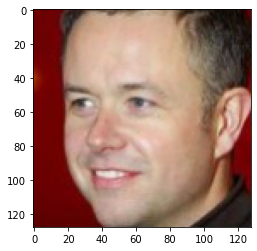

In [3]:
plt.imshow(faces[100][2])

In [5]:
training_data = list()
y_train = list()
for i in range(len(faces)-6):
    for j in range(len(faces[i])):
        example=np.concatenate([np.array(faces[i][0]),np.array(faces[i][j])],axis=2)
        # example.append(faces[i][0])
        # example.append(faces[i][j])
        y_train.append(1)
        training_data.append(example)
    for k in range(i,i+5):
        neg_example=np.concatenate([np.array(faces[i][0]),np.array(faces[k][0])],axis=2)
        # neg_example.append(faces[i][0])
        # neg_example.append(faces[k][0])
        y_train.append(0)
        training_data.append(neg_example)



In [5]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([6590, 6056], dtype=int64))

In [6]:
training_data = np.array(training_data)
y_train = np.array(y_train)

In [7]:
training_data.shape

(12646, 128, 128, 6)

In [15]:
def cnn_model(input_shape):
    inputs = layers.Input(input_shape)
    
    x = layers.Conv2D(16, kernel_size= 3)(inputs)
    x = layers.Activation("relu")(x)    
    x = layers.MaxPool2D()(x)
    
    x = layers.Conv2D(32, kernel_size= 3)(x)
    x = layers.Activation("relu")(x)    
    x = layers.MaxPool2D()(x)
    
    x = layers.Conv2D(64, kernel_size= 3)(x)
    x = layers.Activation("relu")(x)    
    x = layers.MaxPool2D()(x)
    
    x = layers.Conv2D(128, kernel_size= 3)(x)
    x = layers.Activation("relu")(x)    
    x = layers.MaxPool2D()(x)
    
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    
    x = layers.Dense(64)(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Dense(16)(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Dense(1)(x)
    outputs = layers.Activation("sigmoid")(x)
    
    model = Model(inputs, outputs)
    return model
    

In [9]:
dir(tf.keras.losses.B)

AttributeError: module 'keras.api._v2.keras.losses' has no attribute 'B'

In [16]:
input_shape = [128,128,6]
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.0001,momentum=0.9)

model = cnn_model(input_shape)
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 6)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      880       
                                                                 
 activation_8 (Activation)   (None, 126, 126, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 activation_9 (Activation)   (None, 61, 61, 32)        0         
                                                           

In [7]:
x_train,x_test,y_tran,y_test = train_test_split(training_data,y_train,test_size=0.2,shuffle=True)

In [12]:
type(y_tran)

numpy.ndarray

In [19]:
model.fit(x_train,y_tran,epochs=50)

Epoch 1/50
317/317 [==============================] - 141s 444ms/step - loss: 0.6824 - accuracy: 0.5570
Epoch 2/50
317/317 [==============================] - 156s 492ms/step - loss: 0.6718 - accuracy: 0.5776
Epoch 3/50
317/317 [==============================] - 150s 474ms/step - loss: 0.6598 - accuracy: 0.5976
Epoch 4/50
317/317 [==============================] - 132s 416ms/step - loss: 0.6494 - accuracy: 0.6175
Epoch 5/50
317/317 [==============================] - 128s 403ms/step - loss: 0.6419 - accuracy: 0.6255
Epoch 6/50
317/317 [==============================] - 128s 403ms/step - loss: 0.6327 - accuracy: 0.6405
Epoch 7/50
317/317 [==============================] - 128s 403ms/step - loss: 0.6212 - accuracy: 0.6495
Epoch 8/50
317/317 [==============================] - 128s 403ms/step - loss: 0.6131 - accuracy: 0.6567
Epoch 9/50
317/317 [==============================] - 126s 397ms/step - loss: 0.6046 - accuracy: 0.6623
Epoch 10/50
317/317 [==============================] - 122s 384m

In [38]:
model.save(filepath='/AI FR/fr.h5')

In [ ]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of keras.engine.functional.Functional instance
    Trains the model for a fixed number of epochs (dataset iterations).
    
    Args:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return a tuple
            of either `(inputs, 

In [ ]:
y_pred = model.predict(x_test)

80/80 [==============================] - 10s 129ms/step


In [ ]:
np.unique(y_pred)

array([0.], dtype=float32)

In [ ]:
model.predict(x_test[0:3])

1/1 [==============================] - 0s 99ms/step


array([[0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.525691699604743


In [31]:
abd_capture = plt.imread('abd_capture.jpg')
abd_real = plt.imread('abd_real2.jpg')

Number of detected faces: 1


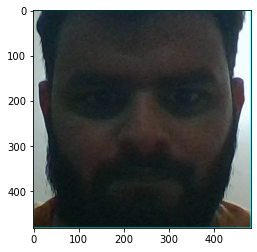

In [32]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(abd_capture, 1.1, 2)
print('Number of detected faces:', len(faces))
for (x,y,w,h) in faces: 
   cv2.rectangle(abd_capture,(x,y),(x+w,y+h),(0,255,255),2)
   extracted_capture = abd_capture[y:y+h,x:x+w]
plt.imshow(extracted_capture)

Number of detected faces: 1


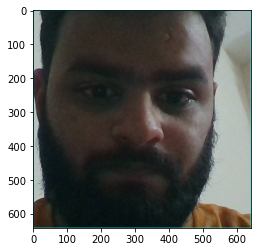

In [33]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(abd_real, 1.3, 2)
print('Number of detected faces:', len(faces))
for (x,y,w,h) in faces: 
   cv2.rectangle(abd_real,(x,y),(x+w,y+h),(0,255,255),2)
   extracted_real = abd_real[y:y+h,x:x+w]
plt.imshow(extracted_real)

In [34]:
extracted_capture = cv2.resize(extracted_capture, (128,128), interpolation = cv2.INTER_AREA)
extracted_real = cv2.resize(extracted_real, (128,128), interpolation = cv2.INTER_AREA)

In [35]:
abd = np.concatenate([extracted_real,extracted_capture],axis=2)
test_data = list()
test_data.append(abd)
test_data=np.array(test_data)
print(model.predict(test_data))

1/1 [==============================] - 0s 52ms/step
[[0.90345114]]


In [ ]:
abd.shape

(128, 128, 6)

In [3]:
fr = keras.models.load_model('fr.h5')

In [9]:
predicted = fr.predict(x_test)

80/80 [==============================] - 15s 168ms/step


In [21]:
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, ConfusionMatrixDisplay,plot_roc_curve

In [17]:
for i in range(len(predicted)):
    if predicted[i]>0.97:
        predicted[i]=1
    else:
        predicted[i]=0

In [18]:
confusion = confusion_matrix(y_test,predicted)

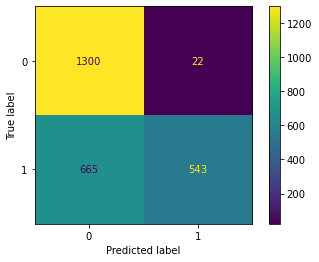

In [20]:
ConfusionMatrixDisplay(confusion_matrix=confusion).plot()
plt.show()

In [28]:
roc_curve(y_test,predicted)

AttributeError: 'tuple' object has no attribute 'plot'